In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 13.9 MB/s 


In [3]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=7d43f683b46d40dd1c3e0d6f15a0bbaffad7148fa97ef8e3d7409797f407e6d2
  Stored in directory: /root/.cache/pip/wheels/2b/76/1a/a29ceb07bfca098e2b0bc8690d550753a0384cbed26d5f47ee
Successfully built keras-facenet


In [4]:
import cv2
from mtcnn import MTCNN
from keras_facenet import FaceNet
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import glob

# Manipulação das imagens

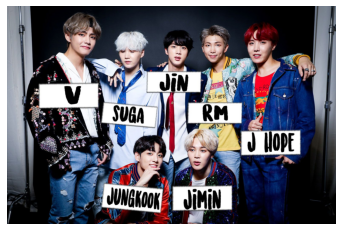

In [ ]:
url = '/content/BTS.jpg'
img = cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
detector = MTCNN()

2/2 [==============================] - 0s 94ms/step


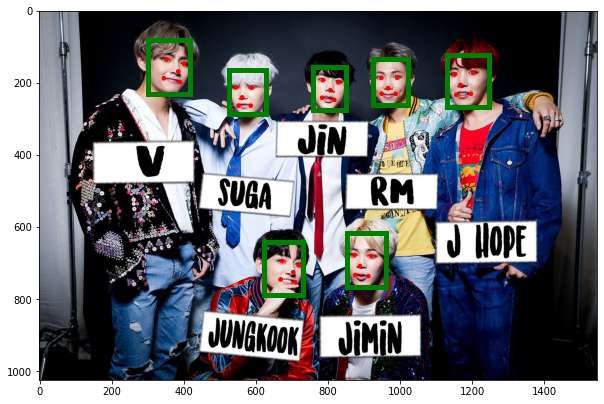

In [ ]:
results = detector.detect_faces(img)

plt.figure(figsize=(10,10))
plt.imshow(img)
ax = plt.gca()

for result in results:
  x, y, width, height = result['box']
  rect = plt.Rectangle((x, y), width, height, fill=False, color='green', lw='5') 
  ax.add_patch(rect)
  for key, value in result['keypoints'].items():
    dot = plt.Circle(value, radius=5, color='red')
    ax.add_patch(dot)
plt.show()

In [ ]:
faces = []
for result in results:
  x,y,width,height = result['box']
  x1,y1 = abs(x),abs(y)
  x2,y2 = x1+width, y1+height

  faces.append(img[y1:y2, x1:x2])

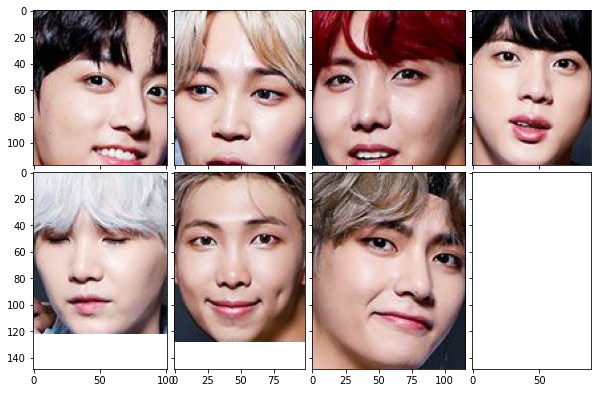

In [ ]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 4),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, faces):
    ax.imshow(im)

plt.show()  

# Gerando o dataset

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bing_image_downloader import downloader

In [ ]:
queries = ['BTS Jin', 'BTS Jimin', 'BTS RM', 'BTS J-Hope', 'BTS Suga', 'BTS Jungkook', 'BTS V']

for item in queries:
  downloader.download(item, limit=100,  output_dir='dataset', adult_filter_off=False, force_replace=False, timeout=60, verbose=True)

In [ ]:
!zip -r dataset.zip dataset/

# Carregando o dataset filtrado

In [ ]:
!unzip '/content/OneDrive_1_25-10-2022.zip' -d 'dataset2/'

In [21]:
embedder = FaceNet()

In [ ]:
df = pd.DataFrame(columns=np.arange(0,512))

categoria = []

idx = 0
for pasta in glob.glob("/content/dataset2/*"):
    arquivos = glob.glob(pasta + '/*')
    for img in arquivos:
      try:
        out = embedder.extract(img, threshold=0.95)
        if len(out) == 1:
          df.loc[idx] = out[0]['embedding']
          categoria.append(pasta)
          print(100*'*')
          print(pasta, df.shape)
          print(100*'*')
          idx += 1
      except:
        pass

1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 165ms/step


A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 32ms/step
****************************************************************************************************
/content/dataset2/BTS Jin (81, 512)
****************************************************************************************************
1/1 [==============================] - 0s 38ms/step
****************************************************************************************************
/content/dataset2/BTS Jin (82, 512)
****************************************************************************************************
1/1 [==============================] - 0s 32ms/step
****************************************************************************************************
/content/dataset2/BTS Jin (83, 512)
****************************************************************************************************
1/1 [==============================] - 0s 27ms/step
*******************

In [ ]:
df['categoria'] = categoria
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,categoria
0,0.011512,-0.027346,-0.047922,0.090120,0.010845,-0.018452,-0.027997,-0.001451,-0.020817,0.033304,...,-0.094775,0.022603,0.067522,0.029357,0.022328,0.013838,-0.060729,0.022326,-0.001874,/content/dataset2/BTS Suga
1,0.020104,0.033120,0.003472,0.069574,0.077415,-0.066666,-0.038666,0.014784,0.035264,0.008787,...,-0.127964,0.021128,0.062727,-0.002205,-0.010341,0.054395,-0.082437,0.040873,0.033977,/content/dataset2/BTS Suga
2,0.012854,0.033665,-0.036811,0.055608,0.059005,-0.006935,-0.041138,0.028697,0.015346,0.041378,...,-0.114224,-0.007111,0.075207,-0.006434,-0.016352,0.018905,-0.075406,0.015329,0.027299,/content/dataset2/BTS Suga
3,-0.010936,-0.004685,-0.031774,0.020714,0.013222,-0.024538,-0.043749,-0.006945,0.044915,-0.008369,...,-0.050823,0.012100,0.024924,-0.016575,-0.060612,0.043658,0.005023,0.126786,0.060176,/content/dataset2/BTS Suga
4,0.039096,-0.006626,-0.074969,0.031085,0.033005,-0.070030,0.006909,0.007150,-0.018346,-0.000910,...,-0.058990,0.011288,0.082279,-0.007995,0.008796,0.005313,-0.066627,0.032533,-0.003584,/content/dataset2/BTS Suga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.006456,0.015267,-0.019889,0.109680,0.018752,-0.005256,-0.051617,0.006322,-0.013822,0.069728,...,-0.045761,0.001789,0.020830,0.040987,0.019672,-0.011927,-0.027677,0.050571,0.006074,/content/dataset2/BTS V
339,-0.015750,-0.009615,-0.046444,0.095144,0.013347,-0.022638,-0.048449,0.010606,-0.051400,0.043151,...,-0.050816,-0.006071,0.046633,0.041720,0.031642,-0.017325,-0.030826,0.056339,0.001524,/content/dataset2/BTS V
340,0.034823,-0.038103,-0.016118,0.058901,0.044422,-0.065862,-0.017477,-0.022300,-0.038072,0.042892,...,-0.018704,-0.012052,0.024229,0.017949,0.038173,0.007403,-0.019040,0.099874,0.038218,/content/dataset2/BTS V
341,-0.030452,0.025411,-0.045688,0.051292,0.085043,-0.026715,-0.041752,0.008261,-0.013286,0.066925,...,-0.084542,-0.023114,0.084708,-0.019446,0.006297,0.029001,-0.089761,0.013515,0.009111,/content/dataset2/BTS V


In [ ]:
df['categoria'] = df['categoria'].apply(lambda x: x[21:])
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,categoria
0,0.011512,-0.027346,-0.047922,0.090120,0.010845,-0.018452,-0.027997,-0.001451,-0.020817,0.033304,...,-0.094775,0.022603,0.067522,0.029357,0.022328,0.013838,-0.060729,0.022326,-0.001874,Suga
1,0.020104,0.033120,0.003472,0.069574,0.077415,-0.066666,-0.038666,0.014784,0.035264,0.008787,...,-0.127964,0.021128,0.062727,-0.002205,-0.010341,0.054395,-0.082437,0.040873,0.033977,Suga
2,0.012854,0.033665,-0.036811,0.055608,0.059005,-0.006935,-0.041138,0.028697,0.015346,0.041378,...,-0.114224,-0.007111,0.075207,-0.006434,-0.016352,0.018905,-0.075406,0.015329,0.027299,Suga
3,-0.010936,-0.004685,-0.031774,0.020714,0.013222,-0.024538,-0.043749,-0.006945,0.044915,-0.008369,...,-0.050823,0.012100,0.024924,-0.016575,-0.060612,0.043658,0.005023,0.126786,0.060176,Suga
4,0.039096,-0.006626,-0.074969,0.031085,0.033005,-0.070030,0.006909,0.007150,-0.018346,-0.000910,...,-0.058990,0.011288,0.082279,-0.007995,0.008796,0.005313,-0.066627,0.032533,-0.003584,Suga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.006456,0.015267,-0.019889,0.109680,0.018752,-0.005256,-0.051617,0.006322,-0.013822,0.069728,...,-0.045761,0.001789,0.020830,0.040987,0.019672,-0.011927,-0.027677,0.050571,0.006074,V
339,-0.015750,-0.009615,-0.046444,0.095144,0.013347,-0.022638,-0.048449,0.010606,-0.051400,0.043151,...,-0.050816,-0.006071,0.046633,0.041720,0.031642,-0.017325,-0.030826,0.056339,0.001524,V
340,0.034823,-0.038103,-0.016118,0.058901,0.044422,-0.065862,-0.017477,-0.022300,-0.038072,0.042892,...,-0.018704,-0.012052,0.024229,0.017949,0.038173,0.007403,-0.019040,0.099874,0.038218,V
341,-0.030452,0.025411,-0.045688,0.051292,0.085043,-0.026715,-0.041752,0.008261,-0.013286,0.066925,...,-0.084542,-0.023114,0.084708,-0.019446,0.006297,0.029001,-0.089761,0.013515,0.009111,V


In [ ]:
df.to_csv('embeddings.csv')

In [ ]:
#!unzip '/content/drive/MyDrive/data/OneDrive_1_25-10-2022.zip' -d '/content/drive/MyDrive/data/dataset2'

# Treinar o SVM

In [8]:
df = pd.read_csv('/content/embeddings.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,categoria
0,0.011512,-0.027346,-0.047922,0.090120,0.010845,-0.018452,-0.027997,-0.001451,-0.020817,0.033304,...,-0.094775,0.022603,0.067522,0.029357,0.022328,0.013838,-0.060729,0.022326,-0.001874,Suga
1,0.020104,0.033120,0.003472,0.069574,0.077415,-0.066666,-0.038666,0.014784,0.035264,0.008787,...,-0.127964,0.021128,0.062727,-0.002205,-0.010341,0.054395,-0.082437,0.040873,0.033977,Suga
2,0.012854,0.033665,-0.036811,0.055608,0.059005,-0.006935,-0.041138,0.028697,0.015346,0.041378,...,-0.114224,-0.007111,0.075207,-0.006434,-0.016352,0.018905,-0.075406,0.015329,0.027299,Suga
3,-0.010936,-0.004685,-0.031774,0.020714,0.013222,-0.024538,-0.043749,-0.006945,0.044915,-0.008369,...,-0.050823,0.012100,0.024924,-0.016575,-0.060612,0.043658,0.005023,0.126786,0.060176,Suga
4,0.039096,-0.006626,-0.074969,0.031085,0.033005,-0.070030,0.006909,0.007150,-0.018346,-0.000910,...,-0.058990,0.011288,0.082279,-0.007995,0.008796,0.005313,-0.066627,0.032533,-0.003584,Suga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.006456,0.015267,-0.019889,0.109680,0.018752,-0.005256,-0.051617,0.006322,-0.013822,0.069728,...,-0.045761,0.001789,0.020830,0.040987,0.019672,-0.011927,-0.027677,0.050571,0.006074,V
339,-0.015750,-0.009615,-0.046444,0.095144,0.013347,-0.022638,-0.048449,0.010606,-0.051400,0.043151,...,-0.050816,-0.006071,0.046633,0.041720,0.031642,-0.017325,-0.030826,0.056339,0.001524,V
340,0.034823,-0.038103,-0.016118,0.058901,0.044422,-0.065862,-0.017477,-0.022300,-0.038072,0.042892,...,-0.018704,-0.012052,0.024229,0.017949,0.038173,0.007403,-0.019040,0.099874,0.038218,V
341,-0.030452,0.025411,-0.045688,0.051292,0.085043,-0.026715,-0.041752,0.008261,-0.013286,0.066925,...,-0.084542,-0.023114,0.084708,-0.019446,0.006297,0.029001,-0.089761,0.013515,0.009111,V


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

In [10]:
X = df.drop('categoria', axis=1)
y, classes = pd.factorize(df['categoria'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (274, 512) (274,)
Test set: (69, 512) (69,)


In [12]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test,y_pred, target_names=classes))

              precision    recall  f1-score   support

        Suga       0.60      0.67      0.63         9
         Jin       0.69      0.82      0.75        11
      J-Hope       0.80      0.57      0.67         7
       Jimin       1.00      0.90      0.95        10
    Jungkook       0.73      0.73      0.73        11
          RM       1.00      0.80      0.89        10
           V       0.69      0.82      0.75        11

    accuracy                           0.77        69
   macro avg       0.79      0.76      0.77        69
weighted avg       0.79      0.77      0.77        69



In [15]:
confusion_matrix(y_test,y_pred)

array([[6, 0, 0, 0, 2, 0, 1],
       [0, 9, 0, 0, 0, 0, 2],
       [2, 1, 4, 0, 0, 0, 0],
       [0, 1, 0, 9, 0, 0, 0],
       [2, 0, 0, 0, 8, 0, 1],
       [0, 1, 1, 0, 0, 8, 0],
       [0, 1, 0, 0, 1, 0, 9]])

# Testar o modelo

In [16]:
def gerar_embeddings(img):
  out = embedder.extract(img, threshold=0.95)
  return [out[0]['embedding']]

1/1 [==============================] - 0s 14ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 68ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 61ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 59ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 65ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 13ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


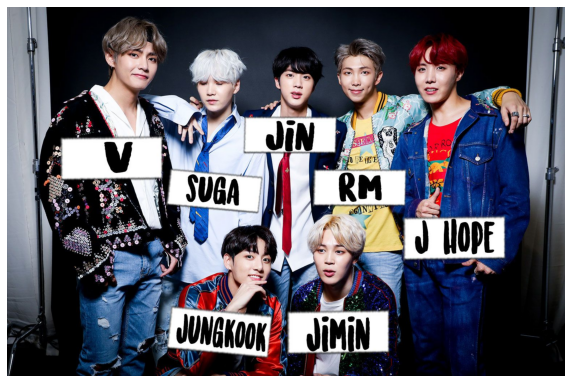

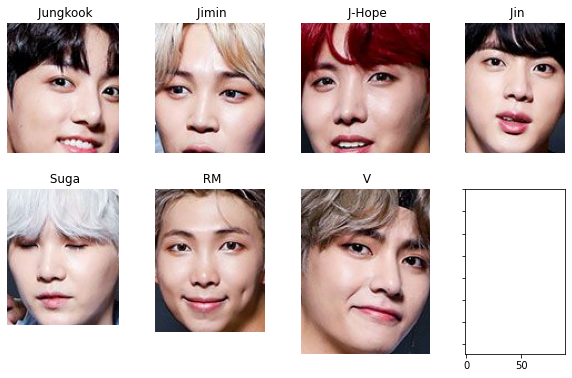

In [24]:
url = '/content/BTS.jpg'
img = cv2.cvtColor(cv2.imread(url), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt. axis('off')

ax = plt.gca()

detector = MTCNN()

results = detector.detect_faces(img)

faces = []
for result in results:
  x,y,width,height = result['box']
  x1,y1 = abs(x),abs(y)
  x2,y2 = x1+width, y1+height

  faces.append(img[y1:y2, x1:x2])

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 4),  
                 axes_pad=0.5,  
                 )

for ax, im in zip(grid, faces):
    ax.imshow(im)
    try:
      pred = classes[clf.predict(gerar_embeddings(im))][0]
      ax.set_title(pred)
    except:
      ax.set_title('')
    ax.axis('off')

plt.show()